# PCA demonstration in python

In [7]:
import numpy as np, pandas as pd

In [8]:
data = pd.read_csv('iris.csv')

In [9]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
y = data.pop('variety')

In [11]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X = data.copy()

In [15]:
x = scaler.fit_transform(X)

In [16]:
x[:5,:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [17]:
### Applying PCA on the data
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x)

PCA(random_state=42)

In [18]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

<BarContainer object of 4 artists>

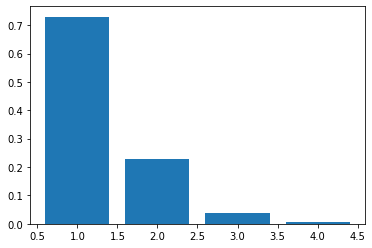

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
#plt.show()

In [20]:
#finding cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [21]:
var_cumu

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

### Plotting Scree plot

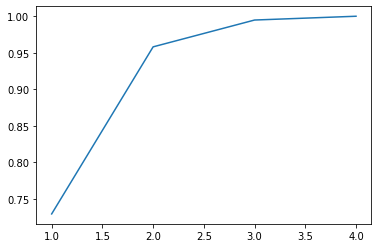

In [22]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

- We can explain 95% of the variance from the data using 2 components out of total 4 components

In [23]:
pc2 = PCA(n_components=2,random_state=42)
newdata = pc2.fit_transform(x)

In [24]:
newdata.shape

(150, 2)

In [25]:
newdata

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [23]:
# Making dataframe
df = pd.DataFrame(newdata,columns=['PC1','PC2'])
df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [24]:
df_final = pd.concat([df,y],axis=1)
df_final.head()

,PC1,PC2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


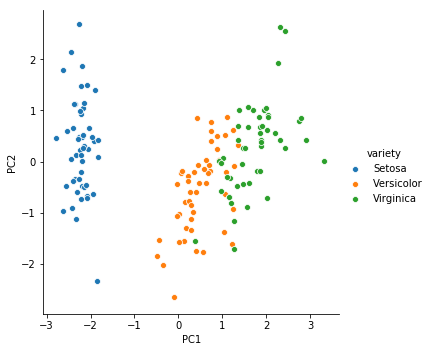

In [25]:
#Plotting  pairplot
import seaborn as sns
sns.pairplot(data=df_final,x_vars=['PC1'],y_vars=['PC2'],hue='variety',height=5)

### K- Means Clustering

In [26]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


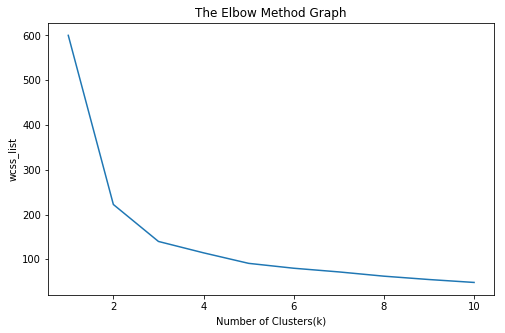

In [28]:
from sklearn.cluster import KMeans
wcss_list = [] #Initializing the list for values of with in cluster sum of squares
# using for loop for iterations from 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()    

- We have elbow method and Silhouette method

- From the above elbow graph we can see there are 3 clusters and after that it is almost forming a straight line

In [29]:
# training the kmeans model
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_predict = kmeans.fit_predict(X) # we should take scaled data only but for demonstration purpose here X is used instead of x

In [30]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
X['clusters'] = y_predict

In [32]:
X

,sepal.length,sepal.width,petal.length,petal.width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
cluster1 =  X[X.clusters==0]
cluster2 =  X[X.clusters==1]
cluster3 =  X[X.clusters==2]

In [35]:
cluster1.head()

,sepal.length,sepal.width,petal.length,petal.width,clusters
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0


In [36]:
cluster1.describe()

,sepal.length,sepal.width,petal.length,petal.width,clusters
count,62.000000,62.000000,62.000000,62.000000,62.0
mean,5.901613,2.748387,4.393548,1.433871,0.0
std,0.466410,0.296284,0.508895,0.297500,0.0
min,4.900000,2.000000,3.000000,1.000000,0.0
25%,5.600000,2.500000,4.025000,1.300000,0.0
50%,5.900000,2.800000,4.500000,1.400000,0.0
75%,6.200000,3.000000,4.800000,1.575000,0.0
max,7.000000,3.400000,5.100000,2.400000,0.0


In [38]:
cluster3.describe()

,sepal.length,sepal.width,petal.length,petal.width,clusters
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,6.850000,3.073684,5.742105,2.071053,2.0
std,0.494155,0.290092,0.488590,0.279872,0.0
min,6.100000,2.500000,4.900000,1.400000,2.0
25%,6.425000,2.925000,5.425000,1.825000,2.0
50%,6.700000,3.000000,5.650000,2.100000,2.0
75%,7.200000,3.200000,6.000000,2.300000,2.0
max,7.900000,3.800000,6.900000,2.500000,2.0
